<a href="https://colab.research.google.com/github/im-indraneel/3D-Ploting-using-Matplot-Lib/blob/main/Face_Recog_7_Sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 10 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=b82eb9a0de363b9c24e2c04da061f793cb074bfd4db8ec01f495bd793a3d28c3
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import imutils #imutils includes opencv functions
import pickle
import time
import cv2
import os

# cv2.imshow() is disabled in Colab, 
# because it causes Jupyter sessions to crash
# As a substitution
from google.colab.patches import cv2_imshow

In [ ]:
# Change the runtime to GPU

from imutils import paths #imutils includes opencv functions
#import face_recognition
#import pickle
#import cv2
#import os                                                                                                                                                     

In [ ]:
!unzip "IMAGES-20211019T083619Z-001.zip"

Archive:  IMAGES-20211019T083619Z-001.zip
  inflating: IMAGES/ATHARV/IMG_20200823_193619_726.jpg  
  inflating: IMAGES/DHANUSH/IMG_20210820_103025.jpg  
  inflating: IMAGES/ATHARV/IMG_20210408_061723.jpg  
  inflating: IMAGES/ATHARV/Screenshot_2021-08-20-10-46-51-432_com.google.android.apps.photos.jpg  
  inflating: IMAGES/ATHARV/IMG_20201113_181229.jpg  
  inflating: IMAGES/DHANUSH/IMG_20210820_102639.jpg  
  inflating: IMAGES/ATHARV/IMG_20200507_181544.jpg  
  inflating: IMAGES/ATHARV/Screenshot_2021-08-20-10-46-59-806_com.google.android.apps.photos.jpg  
  inflating: IMAGES/ATHARV/IMG_20191015_075532.jpg  
  inflating: IMAGES/ATHARV/IMG_20200610_182800_401.jpg  
  inflating: IMAGES/DHANUSH/IMG_20210820_102750.jpg  
  inflating: IMAGES/ATHARV/Screenshot_2021-08-20-10-46-58-101_com.google.android.apps.photos.jpg  
  inflating: IMAGES/DHANUSH/bbfb0e19219bab2aad6ca99c32736058.jpg  
  inflating: IMAGES/DHANUSH/IMG_20210820_103100.jpg  
  inflating: IMAGES/DHANUSH/IMG_20210820_102829.jpg 

In [ ]:
#get paths of each file in folder named Images
#Images here that contains data(folders of various people)
imagePath = list(paths.list_images('IMAGES'))
kEncodings = []
kNames = []

In [ ]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePath):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        kEncodings.append(encoding)
        kNames.append(name)

In [ ]:
#save emcodings along with their names in dictionary data
data = {"encodings": kEncodings, "names": kNames}
#use pickle to save data into a file for later use
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [ ]:
#to find path of xml file containing haarCascade file
cfp = os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# load the harcaascade in the cascade classifier
fc = cv2.CascadeClassifier(cfp)
# load the known faces and embeddings saved in last file
data = pickle.loads(open('face_enc', "rb").read())

In [ ]:
#Find path to the image you want to detect face and pass it here
image = cv2.imread('aj.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for HaarCascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = fc.detectMultiScale(gray,
scaleFactor=1.1,
minNeighbors=6,
minSize=(60, 60),
flags=cv2.CASCADE_SCALE_IMAGE)9

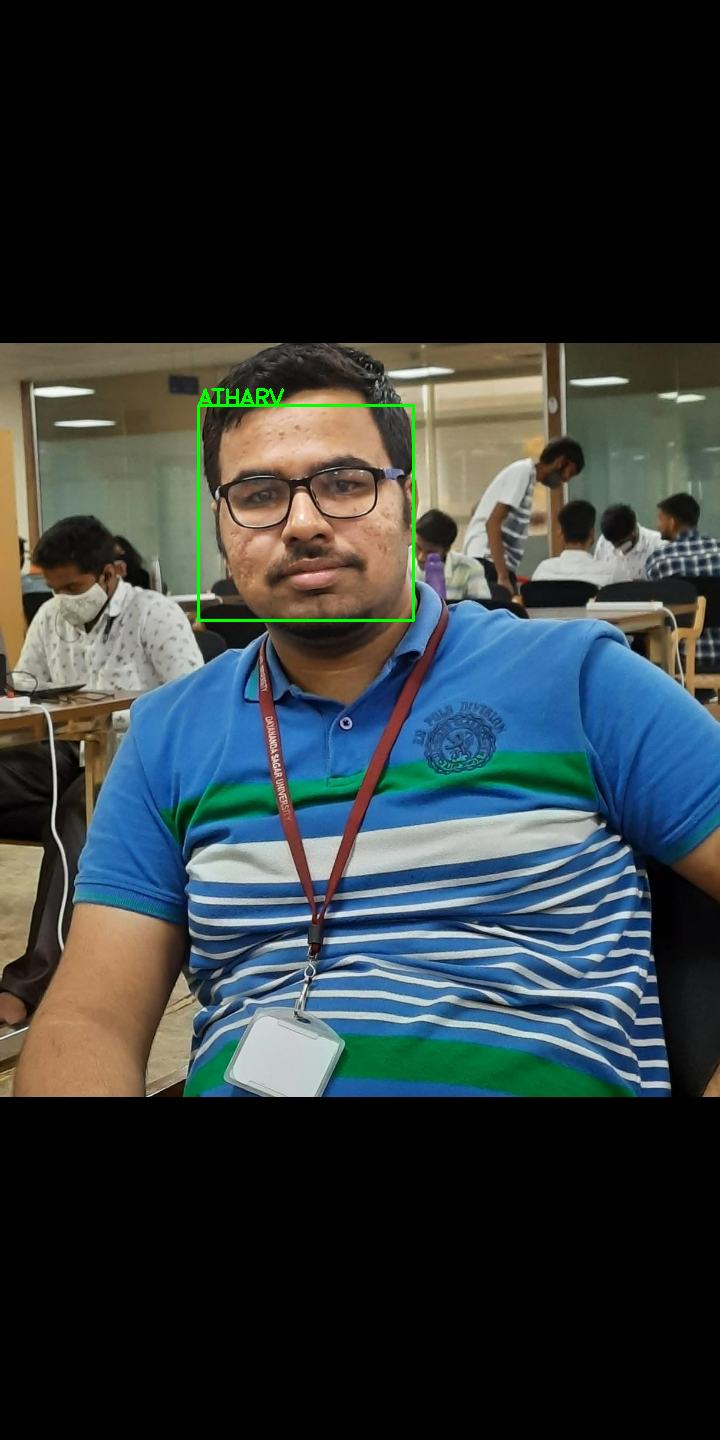



The Above Pic Is Of :	ATHARV


In [ ]:
#Find path to the image you want to detect face and pass it here
image = cv2.imread('ath.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for HaarCascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = fc.detectMultiScale(gray,
scaleFactor=1.1,
minNeighbors=6,
minSize=(60, 60),
flags=cv2.CASCADE_SCALE_IMAGE)




# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []
# loop over the facial embeddings incase
# we have multiple embeddings for multiple fcaes
for encoding in encodings:
  #Compare encodings with encodings in data["encodings"]
  #Matches contain array with boolean values True and False
  matches = face_recognition.compare_faces(data["encodings"],
encoding)
  #set name =unknown if no encoding matches
  name = "Unknown"
  # check to see if we have found a match
  if True in matches:
    #Find positions at which we get True and store them
    matchedIdxs = [i for (i, b) in enumerate(matches) if b]
    count = {}
    # loop over the matched indexes and maintain a count for
    # each recognized face face
    
    for i in matchedIdxs:
      #Check the names at respective indexes we stored in matchedIdxs
      name = data["names"][i]
      #increase count for the name we got
      count[name] = count.get(name, 0) + 1
      #set name which has highest count
      name = max(count, key=count.get)
    
    # will update the list of names
    names.append(name)
    # do loop over the recognized faces
    for ((x, y, w, h), name) in zip(faces, names):
      # rescale the face coordinates
      # draw the predicted face name on the image
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
0.75, (0, 255, 0), 2)
  cv2_imshow(image)
  cv2.waitKey(0)
print('\n\nThe Above Pic Is Of :\t'+str(name))

In [ ]:
face_recognition.face_encodings(rgb)

[array([-0.12869136,  0.02923516,  0.08376099, -0.11363814, -0.10775853,
        -0.00950304, -0.0278957 , -0.0979059 ,  0.20632868, -0.2126621 ,
         0.23553623, -0.00758582, -0.24289134, -0.07749195, -0.04774554,
         0.18520775, -0.13528416, -0.19513762,  0.02814969,  0.0106905 ,
         0.08972679, -0.00656767,  0.11513872,  0.07124805, -0.13476145,
        -0.43881974, -0.12511368, -0.06605199, -0.09104548, -0.03224   ,
         0.07343781,  0.08495159, -0.19981536,  0.03971717, -0.01483414,
         0.12481666, -0.05784404, -0.10027935,  0.20369345,  0.00249208,
        -0.34179473, -0.10455613,  0.07059141,  0.21878323,  0.15716973,
        -0.01007231,  0.05211455, -0.08938479,  0.1393487 , -0.24756806,
         0.1189252 ,  0.12408564,  0.11366838, -0.04723984,  0.1363958 ,
        -0.09441765,  0.01956929,  0.15842311, -0.19006088, -0.00937876,
         0.03648017, -0.02553548,  0.00273532, -0.13420217,  0.17669681,
         0.12304749, -0.14027637, -0.10433858,  0.2